In [1]:
import datetime

import pandas as pd  
import numpy as np
import scipy.optimize as sco
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
tickers = ['AAPL', 'MSFT', 'NFLX', 'AMZN', 'GOOG']
df = pd.DataFrame([pd.read_csv(f'../data/{ticker}.csv')['Close'] for ticker in tickers]).T
df.columns = tickers

In [3]:
df

,AAPL,MSFT,NFLX,AMZN,GOOG
0,36.284286,28.940001,13.928572,131.289993,259.851013
1,36.645714,28.879999,14.260000,130.460007,253.574539
2,37.441429,29.440001,15.404285,133.869995,251.751373
3,36.908573,29.240000,15.715714,131.470001,254.486130
4,36.259998,28.930000,14.365714,128.529999,252.817383
...,...,...,...,...,...
2513,293.160004,178.839996,428.149994,2315.989990,1326.800049
2514,297.559998,180.759995,424.679993,2317.800049,1351.109985
2515,300.630005,182.539993,434.260010,2351.260010,1347.300049
2516,303.739990,183.600006,436.529999,2367.610107,1372.560059


In [4]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252 # 252 - trading days
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
        
    return results_df

In [5]:
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
num_portfolios = 100000
rf = 0.125 # risk-free return
results_frame = simulate_random_portfolios(num_portfolios, mean_returns, cov, rf)

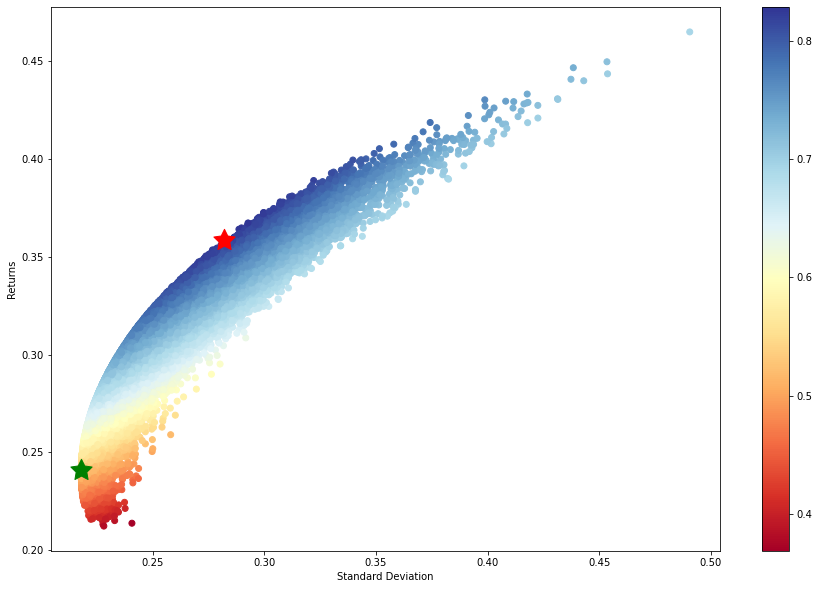

In [6]:
# Locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]

# Locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

# Create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()

# Plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)

# Plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)
plt.show()

In [7]:
max_sharpe_port.to_frame().T

,ret,stdev,sharpe,AAPL,MSFT,NFLX,AMZN,GOOG
45014,0.358504,0.281865,0.828427,0.240117,0.004975,0.292979,0.460514,0.001415


In [8]:
min_vol_port.to_frame().T

,ret,stdev,sharpe,AAPL,MSFT,NFLX,AMZN,GOOG
34192,0.240871,0.217865,0.531849,0.268822,0.328591,0.028857,0.090072,0.283658
